In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 6) # set default figure size, 8in by 6in

This week, you will be learning about unsupervised learning. While supervised learning algorithms need labeled examples (x,y), unsupervised learning algorithms need only the input (x). You will learn about clustering—which is used for market segmentation, text summarization, among many other applications.

# Video W8 01: Unsupervised Learning

[YouTube Video Link](https://www.youtube.com/watch?v=PK5JsJZd1Uk&index=77&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

In an unsupervised learning problem, we are given data that does not have any labels associated with it.  So what we want
from unsupervised learning algorithms is to discover some sort of structure or organization or pattern in our data.  For example,
the easiest type of structure to understand is to try and find clusters in the data of items that appear related.  Such clusters
can be useful in many applications to identify and process the members of a cluster in some specific way, such as clusters of
different types customers and their buying habits.


# Video W8 02: K Means Algorithm

[YouTube Video Link](https://www.youtube.com/watch?v=6u19018FeHg&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=78)

The K-means algorithm is an example of a clustering unsupervised learning algorithm.  It is probably the simplest clustering
algorithm, but it is still quite effective.  Thus it is still one of the most popular and most used clustering algorithms.

K-means is an iterative algorithm.  We start by specifying how many clusters (e.g. K clusters) we want the algorithm to 
discover.  More formally, we can define the **K-means algorithm**

- Input:
  - $K$ (number of clusters)
  - Training set of $m$ inputs $\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}$
- Where $x^{(i)} \in \mathbb{R}^n$ (we drop the $x_0 = 1$ convention)  

And the **K-means algorithm** pseudocode

- Randomly initialize $K$ cluster centroids $\mu_1, \mu_2, \ldots, \mu_K \in \mathbb{R}^n$

- Repeat {
  - for $i = 1$ to $m$
    - $c^{(i)}$ := index (from 1 to $K$) of cluster centroid closest to $x^{(i)}$
  - for $k = 1$ to $K$
    - $\mu_k$ := average (mean) of points assigned to cluster $k$
- }

This basic algorithm for K-means clustering is really fairly simple, and it will help to understand it even further if we make
a quick and basic implementation of the algorithm in Python code.  First of all, we will read in a small simple set of
data that appears to be well separated into 2 clusters.  This dataset has $m = 10$ examples.  The dataset has only 2 features
$n = 2$, thus all of the points are in 2 dimensional space.

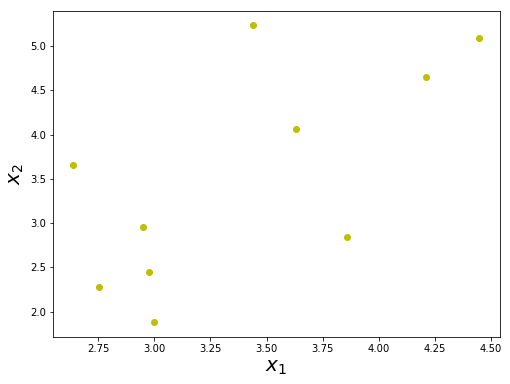

In [2]:
#from sklearn.datasets import make_blobs
#X, y = make_blobs(n_samples = 10, n_features=2, centers=2, cluster_std = 0.8, center_box=(2, 5))
#np.savetxt('data/lect-11-ex1data.csv', X, delimiter=',')
X = np.loadtxt('data/lect-11-ex1data.csv', delimiter=',')

plt.plot(X[:, 0], X[:, 1], 'yo')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)

The first step in the K-means algorithm is to randomly initialize a set of centroids.  We usually initialze the centroids to be
within the ranges of the data set.  So for example, if we find the minimum and maximum values for to data for each of the dimensions,
we can use this to randomly initialize our centroids.  In this case, we are going to try and find $K = 2$ clusters, so we want to
create two centroids within the range of our data:

2.63984211047 4.447966246
1.88228381715 5.23344844636


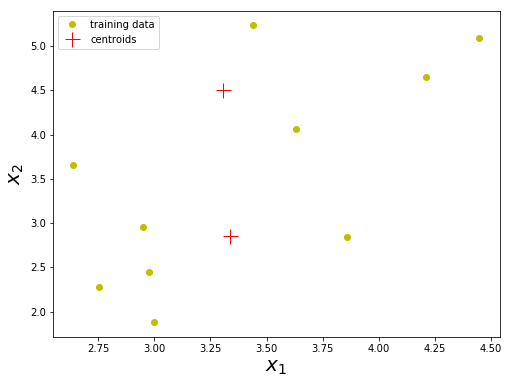

In [3]:
# The number of clusters K we will find
K = 2

# The number of training data points, and the number of dimensions of our data set
m, n = X.shape

# randomly initialize K centroids
min_x1, max_x1 = min(X[:, 0]), max(X[:, 0])
min_x2, max_x2 = min(X[:, 1]), max(X[:, 1])
print(min_x1, max_x1)
print(min_x2, max_x2)

# create K centroids mu, where each point is randomly chosen within the range of the data
mu = np.zeros( (K, n) )
for k in range(K):
    mu[k, 0] = np.random.uniform(low = min_x1, high = max_x1)
    mu[k, 1] = np.random.uniform(low = min_x2, high = max_x2)
    
# visualize the original data, with our randomly chosen initial centroid points
plt.plot(X[:, 0], X[:, 1], 'yo', label='training data')
plt.plot(mu[:,0], mu[:,1], 'r+', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend()

In the video, the first step in the iterative part of the K-means algorithm is to assign each of the training data points to
one of our $\mu$ clusters.  As shown in the video, we do this by calculating the distance between each data point and our
two centroids, and we assign the point to the closest centroid.  The measure used to calculate the distance can actually be
calculated in different ways.  The simplest is to use the eucledian distance.  And since the distance can be negative
depending on the order we evaluate points when calculating the distance, we usually take the square of the distance so that
all values are positive, and we can thus compare directly and find the minimum.

$$
\underset{k}{\textrm{min}} \;\; \| x^{(i)} - \mu_k  \|^2
$$

For example, lets calculate the distance between the first training data point and the two randomly generated centroids.  Keep 
in mind that in Python, our arrays are indexed starting at 0, so the first training data example will be at $i = 0$.  Also, with
$K = 2$ cluster centroids, the $k$ clusters will range from $0$ to $1$.

Lets start by definint a function that will take 2 $n$ dimensional points, and calculate the square of the distance between
the two points:

In [4]:
def distance(x, y):
    # calculate the square of the distance between 2 n dimensional points (passed as numpy arrays)
    return np.sum(x - y)**2.0

In [5]:
# distance from the 0th training example and 0th cluster
i = 0
k = 0
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance(X[i,:], mu[k,:])))

# distance from the 0th training example and 1th cluster
i = 0
k = 1
print("")
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance(X[i,:], mu[k,:])))

0 training example: (3.629798, 4.059775)
0 cluster centroid: (3.305897, 4.501718)
square distance between input 0 and cluster 0: 0.013934

0 training example: (3.629798, 4.059775)
1 cluster centroid: (3.335340, 2.850107)
square distance between input 0 and cluster 1: 2.262396


By the way, the above function for calculating the distance basically does the same thing as calculating 
the norm between the two point vectors

In [6]:
def distance_norm(x, y):
    # calculate the square of the distance between 2 n dimensional points (passed as numpy arrays)
    # using the linear algebra vector norm to calculate the distance
    return np.linalg.norm(x - y)**2.0


In [7]:
# distance from the 0th training example and 0th cluster
i = 0
k = 0
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance(X[i,:], mu[k,:])))

# distance from the 0th training example and 1th cluster
i = 0
k = 1
print("")
print("%d training example: (%f, %f)" % (i, X[i,0], X[i,1]))
print("%d cluster centroid: (%f, %f)" % (k, mu[k,0], mu[k,1]))
print("square distance between input %d and cluster %d: %f" % (i, k, distance(X[i,:], mu[k,:])))

0 training example: (3.629798, 4.059775)
0 cluster centroid: (3.305897, 4.501718)
square distance between input 0 and cluster 0: 0.013934

0 training example: (3.629798, 4.059775)
1 cluster centroid: (3.335340, 2.850107)
square distance between input 0 and cluster 1: 2.262396


The first part of the iterative algorithm is to calculate such distances between each training data item and every centroid, 
find the minimum, and assign the training data item to be in the cluster whose centroid it is closest too.  So for example,
we can determine the closest centroid for each training data point like this

point x[0] in cluster: 0
point x[1] in cluster: 1
point x[2] in cluster: 1
point x[3] in cluster: 0
point x[4] in cluster: 1
point x[5] in cluster: 1
point x[6] in cluster: 1
point x[7] in cluster: 0
point x[8] in cluster: 0
point x[9] in cluster: 1


[2.5, 6.5, 1.5, 5.5]

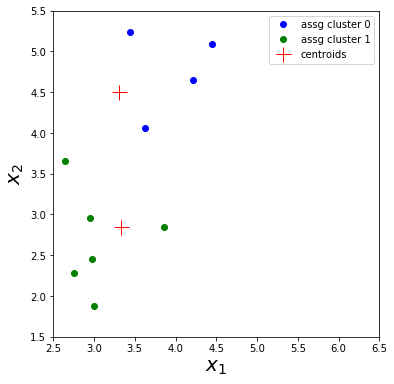

In [8]:
# This array will hold the index k of the cluster centroid each training data point is assigned too
c = np.zeros(m)

# for each training data point i
for i in range(m):
    # determine distance to cluster 0
    min_distance = distance(X[i,:], mu[0, :])
    c[i] = 0
    # find out if any other cluster centroid k=1,...K is closer
    for k in range(1, K):
        another_distance = distance(X[i,:], mu[k, :])
        if another_distance < min_distance:
            min_distance = another_distance
            c[i] = k
            
# the above loop represents the code needed to assign each point to the closest cluster mu.  Here were the
# clusters that each point was assigned to
for i in range(m):
    print("point x[%d] in cluster: %d" % (i, c[i]))
            
# lets visualize the resulting assignments of the points to the current cluster centroids
cluster_0 = np.where(c == 0)[0]
cluster_1 = np.where(c == 1)[0]

#plt.figure(figsize=(8,16))
ax = plt.gca()
ax.set_aspect('equal')

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'bo', label='assg cluster 0')
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'go', label='assg cluster 1')
plt.plot(mu[:,0], mu[:,1], 'r+', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc=1)
plt.axis([2.5, 6.5, 1.5, 5.5])

Once we have found which centroid each training data item is closest, it is time to update the centroids.  We do this by calculating
new mu centroids which are simply the average of all of the points assigned to that centroid.  For example, we can numpy vector
operations and the c array to find and average all of the points assigned to cluster $k = 0$

In [9]:
cluster_0 = np.where(c == 0)[0]
print(X[cluster_0])
print(np.mean(X[cluster_0], axis=0))

[[ 3.62979829  4.05977469]
 [ 3.43797256  5.23344845]
 [ 4.44796625  5.09092891]
 [ 4.21182603  4.65272566]]
[ 3.93189078  4.75921943]


We can use the above idea to recalculate all $K$ centroids:

[[ 3.93189078  4.75921943]
 [ 3.02922467  2.67835639]]


[2.5, 6.5, 1.5, 5.5]

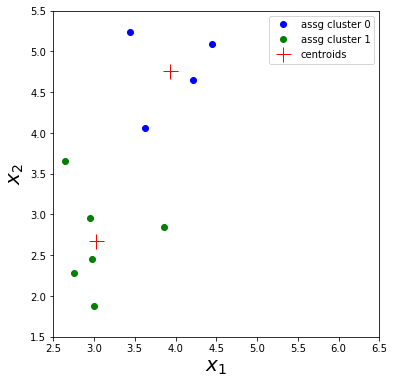

In [10]:
# recalculate all cluster centroids
for k in range(K):
    cluster_pts = np.where(c == k)[0]
    mu[k] = np.mean(X[cluster_pts], axis=0)


# show the resulting new cluster centroids
print(mu)


# visualize the new centroid locations in relation to the assigned points in the clusters
cluster_0 = np.where(c == 0)[0]
cluster_1 = np.where(c == 1)[0]

#plt.figure(figsize=(8,16))
ax = plt.gca()
ax.set_aspect('equal')

plt.plot(X[cluster_0, 0], X[cluster_0, 1], 'bo', label='assg cluster 0')
plt.plot(X[cluster_1, 0], X[cluster_1, 1], 'go', label='assg cluster 1')
plt.plot(mu[:,0], mu[:,1], 'r+', markersize=15, label='centroids')
plt.xlabel(r'$x_1$', fontsize=20)
plt.ylabel(r'$x_2$', fontsize=20)
plt.legend(loc=1)
plt.axis([2.5, 6.5, 1.5, 5.5])

The previous steps to randomly initialize a set of centroids, then repeatedly assign points to closest centroid and move the
centroids can easily be made into a function that performs the basic K-means algorithm.  We will leave this as an exercise
for the student for now to try and bring these pieces together.

# Video W8 03: Optimization Objective

[YouTube Video Link](https://www.youtube.com/watch?v=omcDeBY4lGE&index=79&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW)

As this video discusses, we can formally define a cost function and optimization objective for the K-means algorithm.
The cost function is high when the points in a cluster are far away from the cluster centroid, and it will be lower
when the points in a cluster are close to the cluster centroid:

$$
J(c^{(1)}, \ldots, c^{(m)}, \mu_1, \ldots, \mu_K) = \frac{1}{m} \sum_{i=1}^m \| x^{(i)} - \mu_{c^{(i)}} \|^2
$$

Thus for optimization we are trying to assign our points to clusters, which define the cluster centroids, that minimizes
this cost objective function:

$$
\underset{c^{(1)}, \ldots, c^{(m)}, \\ \mu_1, \ldots, \mu_K}{\textrm{min}} \;\; J(c^{(1)}, \ldots, c^{(m)}, \mu_1, \ldots, \mu_K)
$$

# Video W8 04: Random Initialization

[YouTube Video Link](https://www.youtube.com/watch?v=wniLibHEE2Y&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=80)

Above we showed simply picking $K$ random points within the range of the training data examples in order to randomly choose the
initial cluster centroids.  In this video, the instructor illustrates a different method, which usually works a bit better, and
it is actually a bit easier to understand.  If we want to discover $K$ cluster, we can simply choose $K$ of our input training
data points at random to be our initial centroids.  We know that by picking 2 of the input data points that the centroids will
automatically be within the rang of the training data.  So for example, in Python, we could choose K points at random
to be our centroids like this:

In [11]:
# choose the number of clusters we will be creating
K = 2

# this will choose 2 indexes in range 0 to m-1, that we will use as our initial points for the mu centroids
# NOTE: in the next function, the replace=False ensures that the choice() function will not pick the same random
# index.
random_pts = np.random.choice(m, size=K, replace=False)
print(random_pts)

mu = X[random_pts]
print(mu)

[9 6]
[[ 2.63984211  3.66107634]
 [ 2.75329131  2.28044994]]


# Video W8 05: Choosing the Number of Clusters

[YouTube Video Link](https://www.youtube.com/watch?v=izCbbMbRWHw&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=81)

The most common method is still to choose the number of clusters you want by hand.  Sometimes the problem you are trying to
cluster natually lends itself to a particular number of clusters you desire (e.g. we want to design t-shirts for 3 sizes, S, M and L).  Other times, you can do some visualization of the data, and get a rough idea of how many there might be, but often there can
be different interpretations of this.
